Student Name: **MWEBAZE JUNIOR**

In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
import datetime as dt
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as mtick

In [342]:
import pandas as pd
import gspread
file_name ="/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/Time series/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month(2).csv"
df = pd.read_csv(file_name)
df.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0
22466,42575,28439,Quinwood,city,WV,WV,NaN,Greenbrier County,NaN,NaN,...,38005.0,38210.0,38186.0,38205.0,38308.0,38845.0,38847.0,39158.0,38956.0,40331.0


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


In [344]:
filtered_df = df[df['SizeRank'].isin([0, 1, 2, 3])]
filtered_df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [345]:
# Reset index, making the current index a regular column
filtered_df.reset_index(inplace=True)
filtered_df.head()

,index,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [346]:
filtered_df = filtered_df.rename(columns={'index': 'ID'})
filtered_df.head()

,ID,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [347]:
filtered_df.columns

Index(['ID', 'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=282)

In [348]:
filtered_df

,ID,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


**Transpose date columns into rows**

In [349]:
# Filter columns with a specific naming format
columns_to_melt = [col for col in filtered_df.columns if col.startswith('20')]

# Melt the filtered DataFrame
melted_df = filtered_df.melt(id_vars=['ID'], value_vars=columns_to_melt, var_name='Attribute', value_name='Value')

print(melted_df)

      ID   Attribute     Value
0      0  2000-01-31  253690.0
1      1  2000-01-31  234181.0
2      2  2000-01-31  109068.0
3      3  2000-01-31  166139.0
4      0  2000-02-29  255517.0
...   ..         ...       ...
1087   3  2022-08-31  315587.0
1088   0  2022-09-30  781622.0
1089   1  2022-09-30  966595.0
1090   2  2022-09-30  272639.0
1091   3  2022-09-30  315429.0

[1092 rows x 3 columns]


In [350]:
filtered_df.head()

,ID,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [351]:
# Columns to keep
columns_to_keep = ['ID','RegionID','SizeRank','RegionName','RegionType','StateName','State','Metro','CountyName']
# Drop columns except the ones specified
columns_to_drop = set(filtered_df.columns) - set(columns_to_keep)
columns_to_drop
filtered_df = filtered_df.drop(columns=columns_to_drop)
filtered_df.head()

,ID,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName
0,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County
1,1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County
2,2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County
3,3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County


**Merge the filtered dataset with the melted data set**

In [352]:
# Merge the melted DataFrame with the original filtered DataFrame
merged_df = pd.merge(filtered_df, melted_df, on='ID')

print(merged_df)

      ID  RegionID  SizeRank RegionName RegionType StateName State  \
0      0      6181         0   New York       city        NY    NY   
1      0      6181         0   New York       city        NY    NY   
2      0      6181         0   New York       city        NY    NY   
3      0      6181         0   New York       city        NY    NY   
4      0      6181         0   New York       city        NY    NY   
...   ..       ...       ...        ...        ...       ...   ...   
1087   3     17426         3    Chicago       city        IL    IL   
1088   3     17426         3    Chicago       city        IL    IL   
1089   3     17426         3    Chicago       city        IL    IL   
1090   3     17426         3    Chicago       city        IL    IL   
1091   3     17426         3    Chicago       city        IL    IL   

                                      Metro     CountyName   Attribute  \
0     New York-Newark-Jersey City, NY-NJ-PA  Queens County  2000-01-31   
1     New Y

In [353]:
merged_df.dtypes

ID              int64
RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
State          object
Metro          object
CountyName     object
Attribute      object
Value         float64
dtype: object

In [354]:
merged_df = merged_df.rename(columns={'Attribute': 'Date'})

In [355]:
merged_df.dtypes

ID              int64
RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
State          object
Metro          object
CountyName     object
Date           object
Value         float64
dtype: object

In [356]:
# Remove leading and trailing whitespace from the strings
merged_df['Date'] = merged_df['Date'].str.strip()
merged_df.head()

,ID,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
2,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-03-31,257207.0
3,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-04-30,260310.0
4,0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-05-31,263204.0


In [357]:
#merged_df =merged_df.drop(columns=['Value'])
#merged_df.head()

In [358]:
# Convert the strings to datetime objects
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.head()
merged_df2 = merged_df

In [359]:
merged_df.dtypes

ID                     int64
RegionID               int64
SizeRank               int64
RegionName            object
RegionType            object
StateName             object
State                 object
Metro                 object
CountyName            object
Date          datetime64[ns]
Value                float64
dtype: object

In [360]:
# Group by 'cityname' column
merged_df = merged_df.set_index('Date')
grouped_df = merged_df.groupby('RegionName')

# Resample each group to monthly frequency
monthly_resampled_df = merged_df.groupby('RegionName').resample('M').sum()

print(monthly_resampled_df)

                       ID  RegionID  SizeRank RegionName RegionType StateName  \
RegionName Date                                                                 
Chicago    2000-01-31   3     17426         3    Chicago       city        IL   
           2000-02-29   3     17426         3    Chicago       city        IL   
           2000-03-31   3     17426         3    Chicago       city        IL   
           2000-04-30   3     17426         3    Chicago       city        IL   
           2000-05-31   3     17426         3    Chicago       city        IL   
...                    ..       ...       ...        ...        ...       ...   
New York   2022-05-31   0      6181         0   New York       city        NY   
           2022-06-30   0      6181         0   New York       city        NY   
           2022-07-31   0      6181         0   New York       city        NY   
           2022-08-31   0      6181         0   New York       city        NY   
           2022-09-30   0   

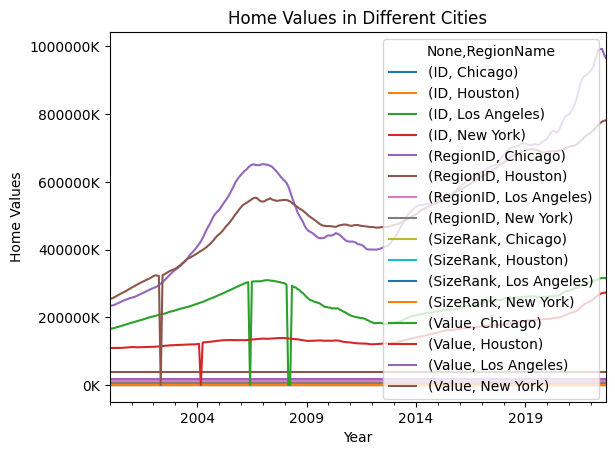

In [361]:
# Unstack the data to create a new DataFrame with cities as columns
df_unstacked = monthly_resampled_df.unstack(level="RegionName")

# Plot the home values for all 4 cities
df_unstacked.plot(kind="line")

# Add a title and labels
plt.title("Home Values in Different Cities")
plt.ylabel("Home Values")
plt.xlabel("Year")
# Format the y-axis ticks using the K-formatter
fmt = "%.0fK"
tick = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

# Show the plot
plt.show()

In [362]:
merged_df.dtypes

ID              int64
RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
State          object
Metro          object
CountyName     object
Value         float64
dtype: object

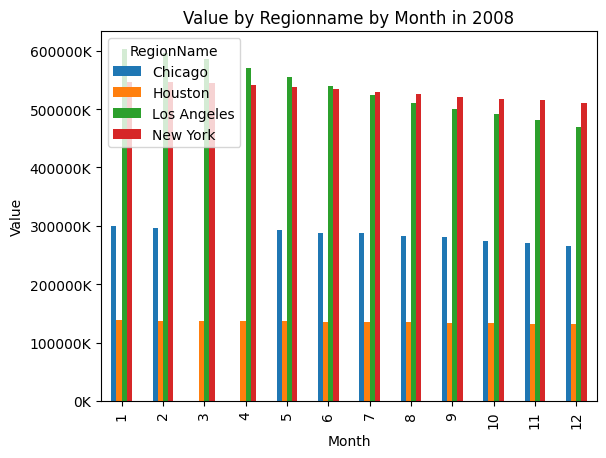

In [368]:
# Create a new dataframe with only data from 2008
import matplotlib.pyplot as plt
# Filter data for year 2008
merged_df2['year'] = pd.to_datetime(merged_df2['Date']).dt.year
merged_df2['month'] = pd.to_datetime(merged_df2['Date']).dt.month
df_2008 = merged_df2[merged_df2['year'] == 2008]
# Group the data by month and regionname
grouped_data = df_2008.groupby(['month', 'RegionName'])['Value'].sum().unstack()

# Plot the data as a bar chart
grouped_data.plot(kind='bar')

# Add a title and labels to the axes
plt.title('Value by Regionname by Month in 2008')
plt.xlabel('Month')
plt.ylabel('Value')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Format the y-axis ticks using the K-formatter
fmt = "%.0fK"
tick = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

# Display the plot
plt.show()

**Which City had the highest Typical Home Value at the end of 2008? Which had the least?**

From the plot above, New York city had the highest value
And Houston had the least Value

**How much did the home values change from November 2008 to December 2008 (in dollars)?**

In [384]:
'''# Extract  2008
nov_2008_data = merged_df2[(merged_df2['Date'].dt.month == 11) & (merged_df2['Date'].dt.year == 2008)]
Dec_2008_data = merged_df2[(merged_df2['Date'].dt.month == 12) & (merged_df2['Date'].dt.year == 2008)]
# Filter data for November and December 2008
filtered_data = merged_df2[merged_df2['Date'].isin([nov_2008_data, Dec_2008_data])]

# Calculate the difference in home values using .diff()
home_value_change = filtered_data['Value'].diff()

# Print the results
print(home_value_change)
'''

"# Extract  2008\nnov_2008_data = merged_df2[(merged_df2['Date'].dt.month == 11) & (merged_df2['Date'].dt.year == 2008)]\nDec_2008_data = merged_df2[(merged_df2['Date'].dt.month == 12) & (merged_df2['Date'].dt.year == 2008)]\n# Filter data for November and December 2008\nfiltered_data = merged_df2[merged_df2['Date'].isin([nov_2008_data, Dec_2008_data])]\n\n# Calculate the difference in home values using .diff()\nhome_value_change = filtered_data['Value'].diff()\n\n# Print the results\nprint(home_value_change)\n"